In [0]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import imshow
from os import listdir
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/question_1_dataset/Train.csv') # read the training data file from working directory
imagePath = '/content/drive/My Drive/question_1_dataset/train/train/'

In [13]:
df

,name,category
0,1.png,9
1,2.png,3
2,3.png,9
3,4.png,8
4,5.png,13
...,...,...
4460,4461.png,8
4461,4462.png,13
4462,4463.png,6
4463,4464.png,14


In [14]:
df['category'].unique()

array([ 9,  3,  8, 13,  7,  2, 16,  6,  1, 14, 15, 12, 10, 11,  5,  4])

In [15]:
train_image = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img('/content/drive/My Drive/question_1_dataset/train/train/'+ df['name'][i], target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 4465/4465 [00:11<00:00, 405.08it/s]


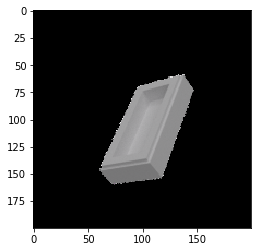

In [16]:
plt.imshow(train_image[0])

In [0]:
y=df['category'].values
y = to_categorical(y)
df['category'].value_counts()
y=pd.get_dummies(df['category'])

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
print((y_test))

      1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
297    0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
969    0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
3434   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
598    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
2377   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
2059   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
1088   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
479    0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
727    0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
3026   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0

[1340 rows x 16 columns]


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(200,200,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [111]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Train on 3125 samples, validate on 1340 samples
Epoch 1/50
3125/3125 [==============================] - 9s 3ms/step - loss: 0.1757 - acc: 0.9309 - val_loss: 0.5232 - val_acc: 0.8299
Epoch 2/50
3125/3125 [==============================] - 9s 3ms/step - loss: 0.1463 - acc: 0.9472 - val_loss: 0.4378 - val_acc: 0.8291
Epoch 3/50
3125/3125 [==============================] - 9s 3ms/step - loss: 0.1222 - acc: 0.9533 - val_loss: 0.4315 - val_acc: 0.8388
Epoch 4/50
3125/3125 [==============================] - 9s 3ms/step - loss: 0.1068 - acc: 0.9581 - val_loss: 0.4885 - val_acc: 0.8321
Epoch 5/50
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0927 - acc: 0.9638 - val_loss: 0.5533 - val_acc: 0.8313
Epoch 6/50
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0817 - acc: 0.9702 - val_loss: 0.5418 - val_acc: 0.8373
Epoch 7/50
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0905 - acc: 0.9693 - val_loss: 0.5344 - val_acc: 0.8381
Epoch 8/50
312

In [128]:
y_predict = model.predict_classes(X_test)
print(y_predict)
Y_test = np.array(y_test)
res = np.argmax(Y_test,axis=1)
print(res)

[ 1  4  7 ... 12  1 10]
[ 1  4  7 ... 12  1 10]


In [113]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
target= ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
matrix = confusion_matrix(res, y_predict)
print(matrix)
print(classification_report(res, y_predict,target_names=target))

[[65  1  2  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 3 74  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 79  0  1  0  0  4  1  0  0  0  0  0  0  0]
 [ 0  0  0 82  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0 72  0  0  3  2  0  0  0  3  3  2  0]
 [ 0  0  0  0  0 25  0  0  7  0  0 40  0  1  0  0]
 [ 0  0  0  0  0  0 85  0  0  0  0  1  0  2  1  0]
 [ 1  0  0  6  1  1  0 73  3  0  0  1  0  0  0  0]
 [ 0  0  1  0  0 22  0  1 41  0  0 11  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 85  0  0  0  1  0  2]
 [ 0  0  0  0  0  0  0  0  0  0 87  0  0  0  0  0]
 [ 0  0  0  0  0 49  0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 87  3  5  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  1 53 23  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0 10 57  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 85]]
              precision    recall  f1-score   support

           1       0.92      0.82      0.87        79
           2       0.99      0.95      0.97        78
           3       0

In [0]:
test_df = pd.read_csv('/content/drive/My Drive/question_1_dataset/Test.csv')

In [115]:
test_image = []
for i in tqdm(range(test_df.shape[0])):
    img = image.load_img('/content/drive/My Drive/question_1_dataset/test/test/'+ test_df['name'][i], target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

100%|██████████| 1914/1914 [11:08<00:00,  3.76it/s]


In [0]:
prediction = model.predict_classes(test)

In [122]:
print(len(prediction))

1914


In [0]:
test_df['category'] = test_df['category']+1
test_df.to_csv('Task1_Predicted_Result.csv')